<a href="https://colab.research.google.com/github/Vaibhav21pandit/Anomaly_Detection_GAN/blob/main/Anomaly_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Save Good Images with following augmentations--
ColorJitter--brightness,contrast,noise \
MotionBlur and blur?--\
affine[sharpness,translate,zoom,flip(horizontal and vrtical)] \


Data Augmentation

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
image_path='/content/good_image.png'

In [ ]:
#Sharpness & Brightness
def sharpness(img_path,gamma_value):
    img=cv2.imread(img_path)
    b,g,r=cv2.split(img)
    b=((b/255)**gamma_value)*float(255)
    g=((g/255)**gamma_value)*float(255)
    r=((r/255)**gamma_value)*float(255)
    im=cv2.merge((b,g,r))
    return im
gamma_values=[0.4,0.6,0.8,1.2]
sharpened_images=[sharpness(image_path,value) for value in gamma_values]

In [ ]:
# Zoom
def zoom(img, value):
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    img = img[h_start:h_start+h_taken, w_start:w_start+w_taken, :]
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img


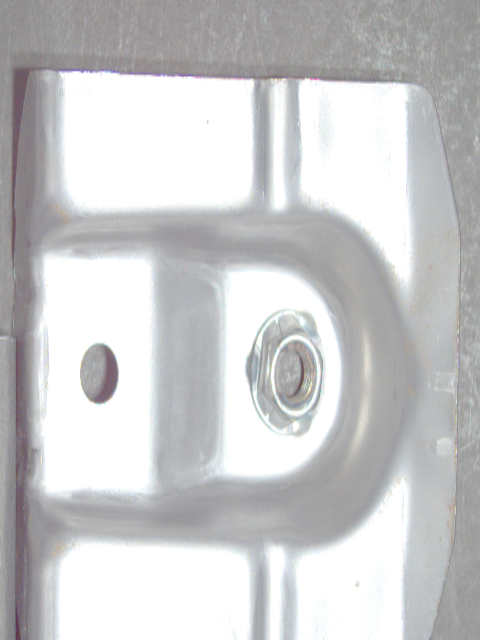

(640, 480, 3)


In [ ]:
zoomed_images=[]
zoom_values=[0.75,0.8]
for image in sharpened_images:
  for value in zoom_values:
    img=zoom(image,value)
    zoomed_images.append(img)
cv2_imshow(zoomed_images[0])
print(zoomed_images[0].shape)

In [ ]:
all_images=[]
all_images.extend(sharpened_images)
all_images.extend(zoomed_images)

In [ ]:
#translation of zoomed and sharpened images
def horizontal_shift(img, ratio):
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]
    img = cv2.resize(img, (h,w), cv2.INTER_CUBIC)
    return img
    
def vertical_shift(img, ratio=0.2):
    h, w = img.shape[:2]
    to_shift = h*ratio
    if ratio > 0:
        img = img[:int(h-to_shift), :, :]
    if ratio < 0:
        img = img[int(-1*to_shift):, :, :]
    img = cv2.resize(img, (h,w), cv2.INTER_CUBIC)
    return img

In [ ]:
ratios=[-0.2,0.2]
horizontal_shifted=vertical_shifted=[]

for image in all_images:
  for ratio in ratios:
    img_horizontal=horizontal_shift(image,ratio)
    img_vertical=vertical_shift(image,ratio)
    horizontal_shifted.append(img_horizontal)
    vertical_shifted.append(img_vertical)
# cv2_imshow(horizontal_shifted[0])

In [ ]:
all_images.extend(horizontal_shifted)
all_images.extend(vertical_shifted)


In [ ]:
len(all_images)

108

In [ ]:
#Flipping horizontal and Vertical
to_flip=random.choices(all_images,k=25)
for image in to_flip:
  image_flipped=cv2.flip(image,-1)
  all_images.append(image_flipped)

In [ ]:
# !mkdir '/content/train/1'
for i,image in enumerate(all_images):
  cv2.imwrite(f'/content/train/1/{i}.png',image)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!wget 'https://drive.google.com/drive/folders/1cKwInUAkdhC2k5yMyuZCPakD0fv-HnoR?usp=sharing'

In [ ]:
!cp -r '/content/train' '/gdrive/My Drive/train'